# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [3]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

In [7]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [8]:
import numpy as np
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from ddpg_agent import Agent, ReplayBuffer
from unityagents import UnityEnvironment

In [9]:
agent = Agent(state_size=24, action_size=2, random_seed=42)

Episode 1	max_score: 0.00
Episode 2	max_score: 0.10
Episode 3	max_score: 0.00
Episode 4	max_score: 0.00
Episode 5	max_score: 0.00
Episode 6	max_score: 0.00
Episode 7	max_score: 0.00
Episode 8	max_score: 0.00
Episode 9	max_score: 0.00
Episode 10	max_score: 0.00
Episode 10	average_score: 0.01
Episode 11	max_score: 0.00
Episode 12	max_score: 0.00
Episode 13	max_score: 0.00
Episode 14	max_score: 0.00
Episode 15	max_score: 0.00
Episode 16	max_score: 0.00
Episode 17	max_score: 0.10
Episode 18	max_score: 0.00
Episode 19	max_score: 0.00
Episode 20	max_score: 0.00
Episode 20	average_score: 0.01
Episode 21	max_score: 0.00
Episode 22	max_score: 0.00
Episode 23	max_score: 0.00
Episode 24	max_score: 0.00
Episode 25	max_score: 0.10
Episode 26	max_score: 0.00
Episode 27	max_score: 0.00
Episode 28	max_score: 0.00
Episode 29	max_score: 0.00
Episode 30	max_score: 0.00
Episode 30	average_score: 0.01
Episode 31	max_score: 0.00


/home/workspace/ddpg_agent.py:116: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1) #Clipping gradiants of the critic local network, P2 Continuous Project instruction - Benchmarking implementation


Episode 32	max_score: 0.10
Episode 33	max_score: 0.00
Episode 34	max_score: 0.00
Episode 35	max_score: 0.00
Episode 36	max_score: 0.00
Episode 37	max_score: 0.00
Episode 38	max_score: 0.00
Episode 39	max_score: 0.00
Episode 40	max_score: 0.00
Episode 40	average_score: 0.01
Episode 41	max_score: 0.00
Episode 42	max_score: 0.00
Episode 43	max_score: 0.00
Episode 44	max_score: 0.00
Episode 45	max_score: 0.00
Episode 46	max_score: 0.00
Episode 47	max_score: 0.00
Episode 48	max_score: 0.00
Episode 49	max_score: 0.00
Episode 50	max_score: 0.00
Episode 50	average_score: 0.01
Episode 51	max_score: 0.00
Episode 52	max_score: 0.00
Episode 53	max_score: 0.00
Episode 54	max_score: 0.00
Episode 55	max_score: 0.00
Episode 56	max_score: 0.00
Episode 57	max_score: 0.00
Episode 58	max_score: 0.00
Episode 59	max_score: 0.00
Episode 60	max_score: 0.00
Episode 60	average_score: 0.01
Episode 61	max_score: 0.00
Episode 62	max_score: 0.00
Episode 63	max_score: 0.00
Episode 64	max_score: 0.00
Episode 65	max_s

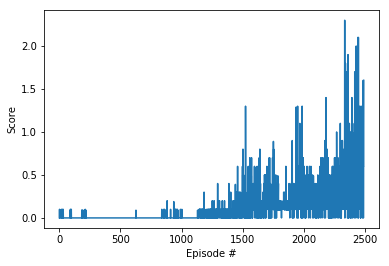

In [10]:
def ddpg(n_episodes=3500, max_t=1000, print_every=10, Target_average_score=0.5):
    total_scores_deque = deque(maxlen=100)
    total_scores = []
    
    for i_episode in range(1, n_episodes+1):

        env_info = env.reset(train_mode=True)[brain_name]       # reset the environment    
        states = env_info.vector_observations                   # get the current state (for each agent)
        scores = np.zeros(num_agents)                           # initialize the score (for each agent)
        agent.reset()
        
                
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]            # send actions to the env
            next_states = env_info.vector_observations          # get next state (for each agent)
            rewards = env_info.rewards                             # get reward (for each agent), 
            #rewards = [i * 0.1 for i in rwrd]                   #rescale the rewars for more stability (see the DDPG paper)
            dones = env_info.local_done                         # Check if episode finished
            
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done) # send Tuples to the agent
            
            scores += env_info.rewards                          # score update (for each agent)
            states = next_states                                # roll over states to next time step
            
            if t % 20==0: #  Start Learning from Shared replay buffer from 10 Samples every 20 steps
                for _ in range(10): #  Learn 10 Samples
                    agent.go_learn()
            
            if np.any(dones):                                   # exit when done
                break
    
        max_score = np.max(scores)
        total_scores_deque.append(max_score)
        total_scores.append(max_score)
        average_score = np.mean(total_scores_deque)
        
 
        print('\rEpisode {}\tmax_score: {:.2f}'
              .format(i_episode,max_score))

        if i_episode % print_every == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\taverage_score: {:.2f}'.format(i_episode, average_score))  
            
        if average_score >= Target_average_score and i_episode >= 100:
            print('Environment solved after {} episodes... Average score: {:.2f}'.format(i_episode, average_score))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    
    return total_scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()                    
                      

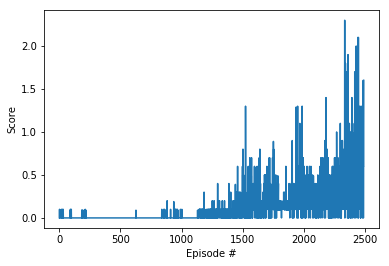

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()   